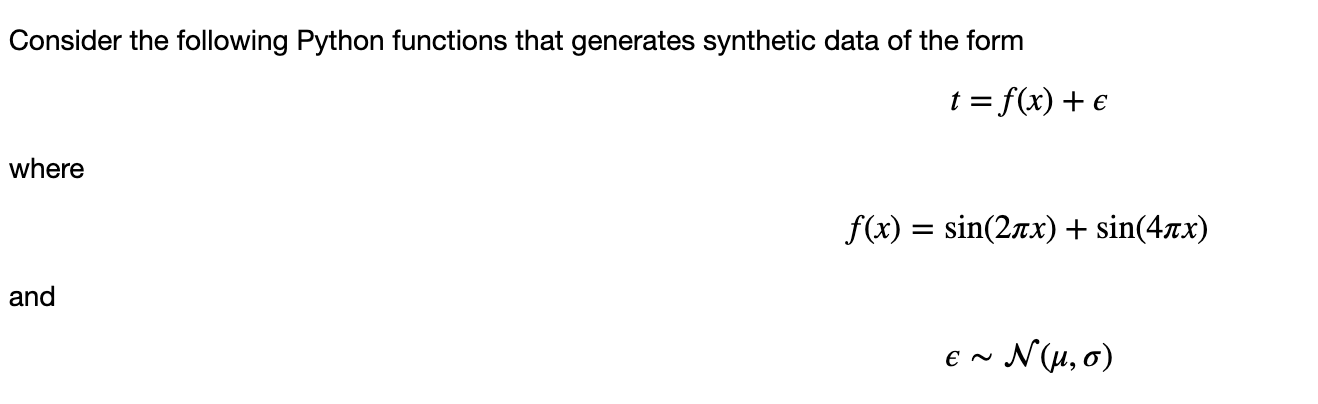
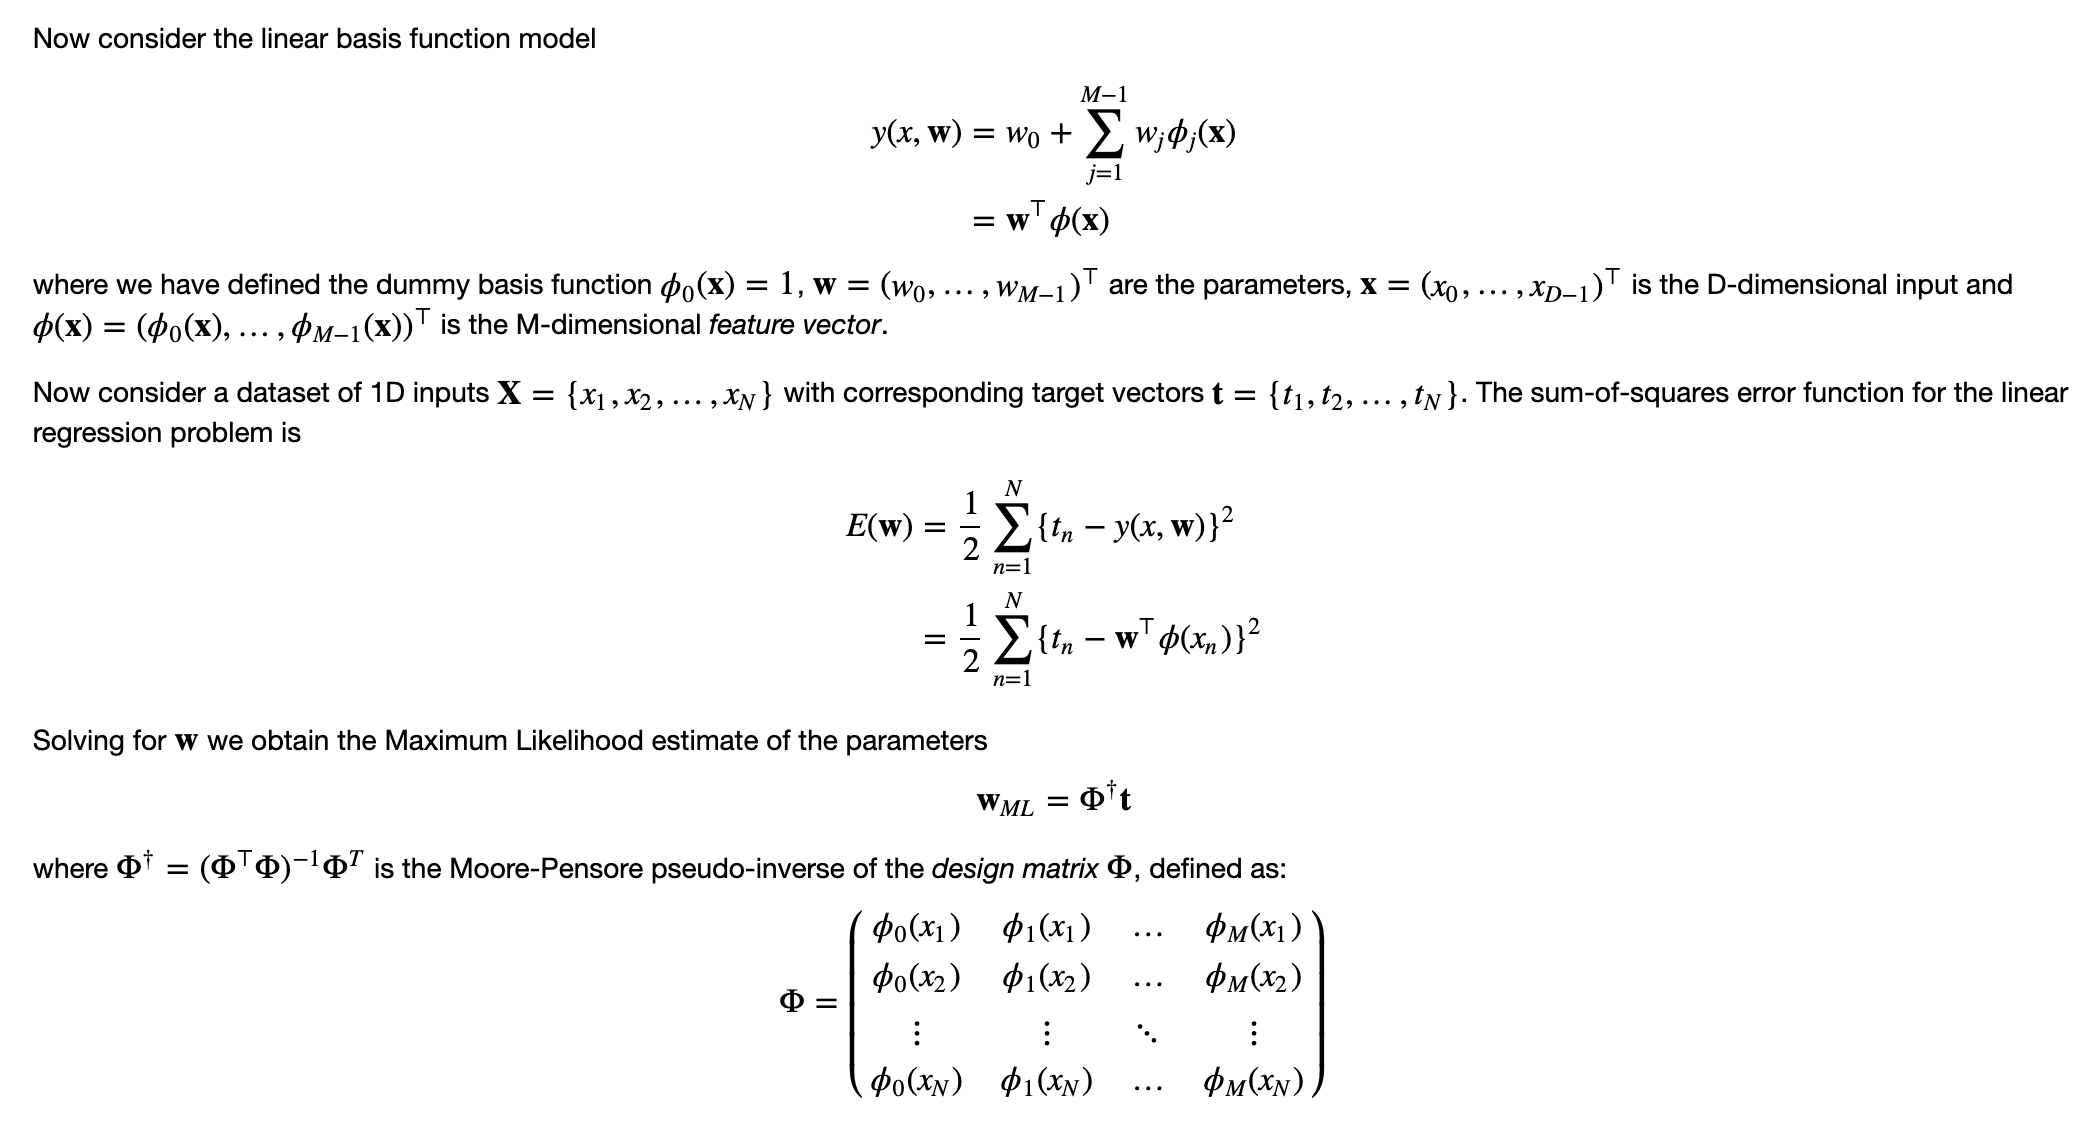

In [3]:
#Fitting Synthetic data to Gaussian and Sigmoidal Basis Functions
#Problem 1 
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    fmax = np.sqrt((207 + 33**1.5)/128)
    return (np.sin(2 * np.pi * x) + np.sin(4 * np.pi * x))/fmax

def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def build_design_matrix(x,means,var):
  W = np.zeros((len(x),len(means)))
  for k in range(len(means)):
    for i in range(len(x)):
      gauss = np.exp((-0.5 * (x[i] - means[k]) ** 2) / var ** 2)
      W[i,k] = gauss
  return W  

class LinearRegression(object):
    def fit(self, W, t):
        # W is the design matrix for the training data and t is the corresponding target variables
        # compute the weights self.w and the variance self.var
        self.w = np.linalg.pinv(W) @ t
        self.var = np.mean(np.square(t- W @ (self.w).T))

    def predict(self, W):
        # W is the design matrix for the test data
        # returns the prediction y(x, self.w) and the variance y_std = self.var
        y = W @ self.w
        y_std = self.var
        return y 

Text(0.5, 1.0, 'Gaussian Basis')

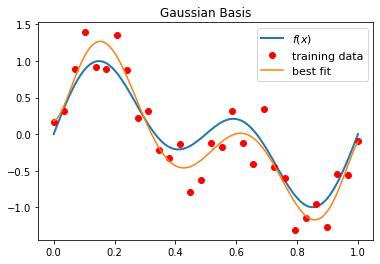

In [4]:
np.random.seed(42) # fix the random seed
x_train, y_train = create_toy_data(func, 30, 0.33)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)
means = np.linspace(0, 1, 8)
var = 1
model = LinearRegression()
X_train = build_design_matrix(x_train,means,var)
model.fit(X_train,y_train)
X_test = build_design_matrix(x_test,means,var)
y_fit = model.predict(X_test)

plt.plot(x_test, y_test, lw = 2, label = '$f(x)$')
plt.plot(x_train, y_train, 'ro', label = 'training data')
plt.plot(x_test, y_fit, label = 'best fit')
plt.legend(fancybox = True, fontsize = 11, loc = 'best')
plt.title('Gaussian Basis')

Text(0.5, 1.0, 'Sigmoidal Basis')

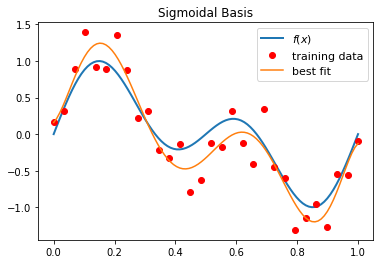

In [5]:
def build_design_matrix2(x,means,var):
  W = np.zeros((len(x),len(means)))
  for k in range(len(means)):
    for i in range(len(x)):
      sigmoidal = 1/(1+np.exp(-(x[i]-means[k])/var))
      W[i,k] = sigmoidal
  return W  
np.random.seed(42) # fix the random seed
x_train, y_train = create_toy_data(func, 30, 0.33)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)
means = np.linspace(0, 1, 8)
var = 1
model = LinearRegression()
X_train = build_design_matrix2(x_train,means,var)
model.fit(X_train,y_train)
X_test = build_design_matrix2(x_test,means,var)
y_fit = model.predict(X_test)
plt.figure()
plt.plot(x_test, y_test, lw = 2, label = '$f(x)$')
plt.plot(x_train, y_train, 'ro', label = 'training data')
plt.plot(x_test, y_fit, label = 'best fit')
plt.legend(fancybox = True, fontsize = 11, loc = 'best')
plt.title('Sigmoidal Basis')